In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import shapiro

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.formula.api import ols

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# order_sheet 데이터 분석

# 전처리된 order 데이터 불러오기

In [4]:
# 전처리된 order 데이터 불러오기

df_order = pd.read_csv("order_preprocess_sheet.csv", engine='python')
df_order.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,주문년월
0,0,0,0,무통장입금,44550,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,...,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,1812
1,1,1,1,무통장입금,44000,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,1812
2,2,2,2,무통장입금,6820,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,...,비회원,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910,42998,1812
3,3,3,3,무통장입금,49500,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,1812
4,4,4,4,무통장입금,61600,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,...,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,1812


In [5]:
# 월별 판매수량

df_order_month = df_order.groupby('주문년월').count()
df_order_month = df_order_month.reset_index()
df_order_month = df_order_month[['주문년월','결제수단']]
df_order_month.columns = ['주문년월','월별판매수량']
df_order_month

,주문년월,월별판매수량
0,1701,4
1,1702,26
2,1703,42
3,1704,48
4,1705,85
5,1706,126
6,1707,172
7,1708,155
8,1709,167
9,1710,155


In [6]:
# 상품판매이익 파생변수 만들기

df_order["상품판매이익"] = df_order["상품구매금액"]-df_order["공급원가"]
df_order.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,...,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,주문년월,상품판매이익
0,0,0,0,무통장입금,44550,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,...,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,1812,26900
1,1,1,1,무통장입금,44000,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,...,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,1812,97240
2,2,2,2,무통장입금,6820,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,...,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910,42998,1812,7090
3,3,3,3,무통장입금,49500,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,...,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,1812,32100
4,4,4,4,무통장입금,61600,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,...,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,1812,33110


In [7]:
# 월별 매출액

df_order_month_p = df_order.groupby('주문년월').sum()
df_order_month_p = df_order_month_p.reset_index()
df_order_month_p = df_order_month_p[['주문년월','상품구매금액']]
df_order_month_p.columns = ['주문년월','월별매출액']
df_order_month_p

,주문년월,월별매출액
0,1701,174200
1,1702,1301715
2,1703,2793545
3,1704,2922940
4,1705,4851730
5,1706,7449730
6,1707,10791555
7,1708,9136970
8,1709,11930195
9,1710,11304120


In [8]:
# 월별 수익

df_order_month_be = df_order.groupby('주문년월').sum()
df_order_month_be = df_order_month_be.reset_index()
df_order_month_be = df_order_month_be[['주문년월','상품판매이익']]
df_order_month_be.columns = ['주문년월','월별수익']
df_order_month_be

,주문년월,월별수익
0,1701,51800
1,1702,363855
2,1703,801075
3,1704,931340
4,1705,1638350
5,1706,2777780
6,1707,4931235
7,1708,3894670
8,1709,5731805
9,1710,5015350


In [9]:
# 주문년월에 따른 월별판매수량과 월별매출액

df_mer_order_month = pd.merge(df_order_month, df_order_month_p, on='주문년월', how='inner')
df_mer_order_month.head()

,주문년월,월별판매수량,월별매출액
0,1701,4,174200
1,1702,26,1301715
2,1703,42,2793545
3,1704,48,2922940
4,1705,85,4851730


In [10]:
# 주문년월에 따른 월별판매수량과 월별매출액, 월별수익

df_mer_order_month = pd.merge(df_mer_order_month, df_order_month_be, on='주문년월', how='inner')
df_mer_order_month.head()

,주문년월,월별판매수량,월별매출액,월별수익
0,1701,4,174200,51800
1,1702,26,1301715,363855
2,1703,42,2793545,801075
3,1704,48,2922940,931340
4,1705,85,4851730,1638350


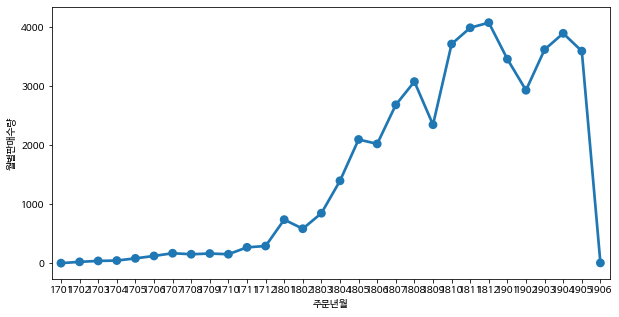

In [11]:
# 주문년월에 따른 월별판매수량 그래프

plt.figure(figsize=[10,5])
sns.pointplot(data=df_mer_order_month, x='주문년월', y='월별판매수량')

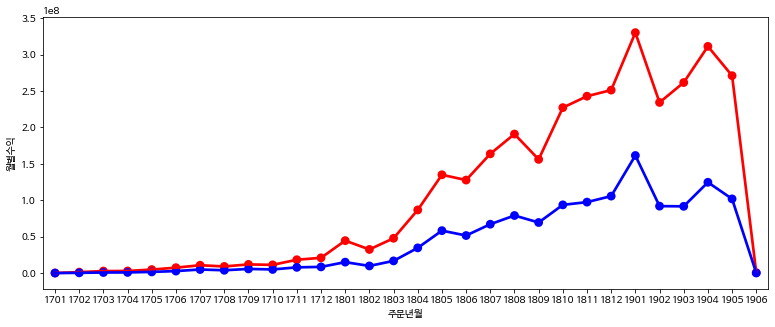

In [12]:
# 주문년월에 따른 월별매출액(red)과 월별수익(blue) 판매량

plt.figure(figsize=[13,5])
sns.pointplot(data=df_mer_order_month, x='주문년월', y='월별매출액',color='r',label='월별매출액')
sns.pointplot(data=df_mer_order_month, x='주문년월', y='월별수익',color='b',label='월별수익')

In [33]:
# 상품번호로 묶은 전체수량과 상품구매금액(사은품포함 모든제품)

product_p1 = pd.pivot_table(data=df_order, index=('상품번호','상품명'),values=['상품구매금액','수량'],aggfunc='sum').reset_index()
product_p1

,상품번호,상품명,상품구매금액,수량
0,38,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",30359400,490
1,39,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",6646410,93
2,40,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",16915410,142
3,41,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",14161240,113
4,42,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",37785215,576
...,...,...,...,...
643,1632,225파이 뚜껑 200개 1BOX,22500,1
644,1633,"5/8 직화용기320mm,295mm,사각직화용기270mm샘플",6430,1
645,1679,5칸 도시락 용기 04 뚜껑 50개,6500,1
646,1680,"5/27 320파이,250파이 원형직화냄비, 270,250 사각 직화냄비 샘플",12740,1


In [47]:
# 많이 팔린 순으로 상품명 나열

product_p1_sum = product_p1.sort_values(by='수량', ascending=False)
product_p1_sum = product_p1_sum.head(10)
product_p1_sum

,상품번호,상품명,상품구매금액,수량
209,455,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),128355045,2295
560,1373,210파이 중화면용기 소 300개 1박스,123165355,2241
561,1374,210파이 중화면용기 중 300개 1박스,143243350,2214
288,608,195파이 탕용기 대 300개 1set(2박스),116195110,1607
467,1237,사은품) 반짝이 수세미,0,1577
370,1077,195파이 탕용기 소 300개 1set(2박스),100929960,1524
441,1209,사은품) 독일정품 칼라 행주(3개입),0,1457
286,603,195파이 미니탕용기 블랙 300개 1set(2박스),102997200,1419
468,1238,사은품) 맛있숟갈 숟가락 100개(검정),0,1329
157,355,사은품) 고무장갑,23100,1203


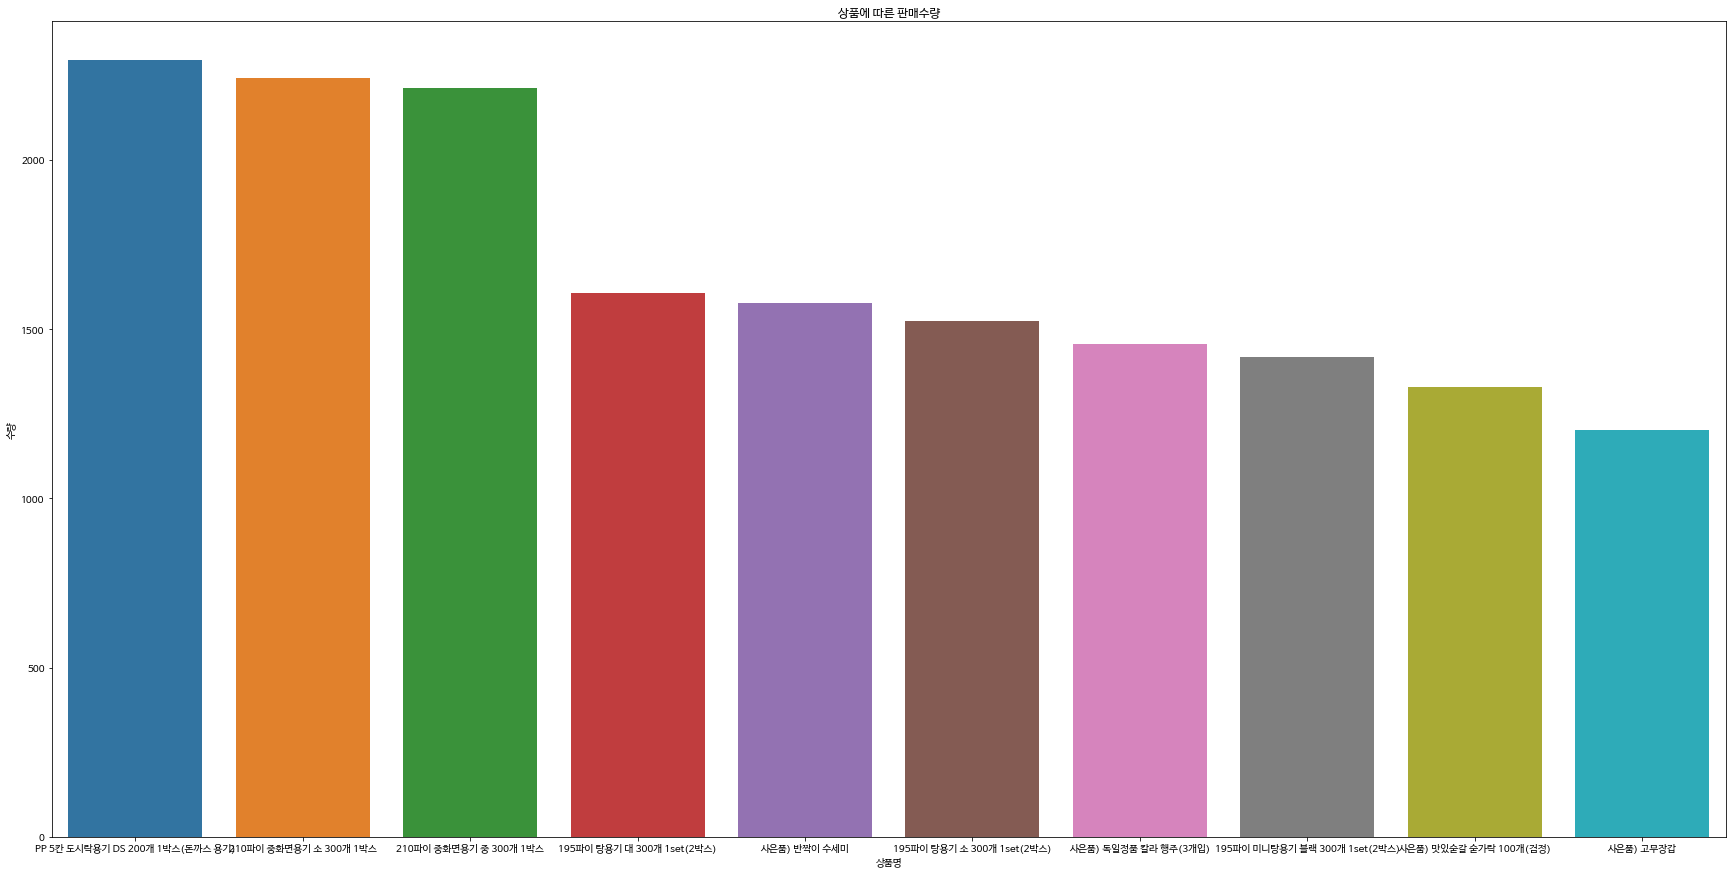

In [46]:
# order(사은품포함) 가장 많이 팔린 상품 top10

plt.figure(figsize=[30,15])
plt.title("상품에 따른 판매수량")
sns.barplot(data=product_p1_sum, x='상품명', y='수량')

# 제품판매 order(사은품제외) 데이터 불러오기

In [49]:
# 제품판매 order(사은품제외) 데이터 불러오기

df_order_pro = pd.read_csv("order_product_sheet.csv", engine='python')
df_order_pro

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,결제수단,공급원가,교환구분,네이버 포인트,배송번호,배송비 정보,배송시작일,...,주문 시 회원등급,주문경로,주문번호,주문일시,주문자ID,카드사,쿠폰 할인금액,판매가,품목번호,주문년월
0,0,0,0,무통장입금,44550,교환안함,0,D-20181227-0000648-00,무료,2019-01-07 오전 8:56,...,전화주문 고객,PC쇼핑몰,20181227-0000648,2018-12-27 오후 2:54,pp683,기타,0,71450,42602,1812
1,1,1,1,무통장입금,44000,교환안함,0,D-20181229-0000119-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181229-0000119,2018-12-29 오후 1:22,asd0908,기타,0,70620,42930,1812
2,2,2,2,무통장입금,6820,교환안함,0,D-20181230-0000100-00,무료,2019-01-03 오전 9:30,...,비회원,모바일웹,20181230-0000100,2018-12-30 오후 3:15,unsinged_0,기타,0,13910,42998,1812
3,3,3,3,무통장입금,49500,교환안함,0,D-20181231-0000087-00,무료,2019-01-03 오전 9:30,...,일반,모바일웹,20181231-0000087,2018-12-31 오전 10:30,23533593@n,기타,0,81600,43063,1812
4,4,4,4,무통장입금,61600,교환안함,0,D-20181231-0000108-00,무료,2019-01-07 오전 8:56,...,사업자,모바일웹,20181231-0000108,2018-12-31 오전 10:43,romandoll,기타,0,94710,43066,1812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37506,37506,46656,46744,카드,36300,교환안함,0,D-20171229-0000036-00,무료,2017-12-29 오후 4:32,...,일반,모바일웹,20171229-0000036,2017-12-29 오후 1:39,73987748@n,국민,0,52800,3170,1712
37507,37507,46657,46745,카드,36300,교환안함,0,D-20171229-0000043-00,무료,2018-01-03 오전 9:45,...,사업자,모바일웹,20171229-0000043,2017-12-29 오후 5:16,chuheesuk,비씨,0,56100,3172,1712
37508,37508,46658,46746,카드,22280,교환안함,300,D-20171230-0000022-01,무료,2018-01-02 오후 7:06,...,비회원,네이버 페이,20171230-0000022,2017-12-30 오후 6:56,unsinged_754,기타,0,36000,3177,1712
37509,37509,46659,46747,카드,55000,교환안함,320,D-20171231-0000017-01,무료,2018-01-03 오후 2:00,...,비회원,네이버 페이,20171231-0000017,2017-12-31 오전 10:00,unsinged_464,기타,0,73460,3178,1712


In [50]:
# 상품번호로 묶은 전체수량과 상품구매금액(제품만/사은품제외)

product_p2 = pd.pivot_table(data=df_order_pro, index=('상품번호','상품명'),values=['상품구매금액','수량'],aggfunc='sum').reset_index()
product_p2

,상품번호,상품명,상품구매금액,수량
0,38,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",30359400,490
1,39,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",6646410,93
2,40,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",16915410,142
3,41,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",14161240,113
4,42,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",37785215,576
...,...,...,...,...
611,1632,225파이 뚜껑 200개 1BOX,22500,1
612,1633,"5/8 직화용기320mm,295mm,사각직화용기270mm샘플",6430,1
613,1679,5칸 도시락 용기 04 뚜껑 50개,6500,1
614,1680,"5/27 320파이,250파이 원형직화냄비, 270,250 사각 직화냄비 샘플",12740,1


In [51]:
# 많이 팔린 순으로 상품명 나열(사은품제외)

product_p2_sum = product_p2.sort_values(by='수량', ascending=False)
product_p2_sum = product_p2_sum.head(10)
product_p2_sum

,상품번호,상품명,상품구매금액,수량
198,455,PP 5칸 도시락용기 DS 200개 1박스(돈까스 용기),128355045,2295
528,1373,210파이 중화면용기 소 300개 1박스,123165355,2241
529,1374,210파이 중화면용기 중 300개 1박스,143243350,2214
267,608,195파이 탕용기 대 300개 1set(2박스),116195110,1607
348,1077,195파이 탕용기 소 300개 1set(2박스),100929960,1524
265,603,195파이 미니탕용기 블랙 300개 1set(2박스),102997200,1419
330,1036,210파이 중화면용기 중 400개 1박스,85067185,885
329,1035,210파이 중화면용기 소 400개 1박스,69590350,821
155,378,"225파이 탕용기 소 1,800ml 200개 1set(2박스)",48596720,701
264,602,195파이 미니탕용기 백색 300개 1set(2박스),51113080,700


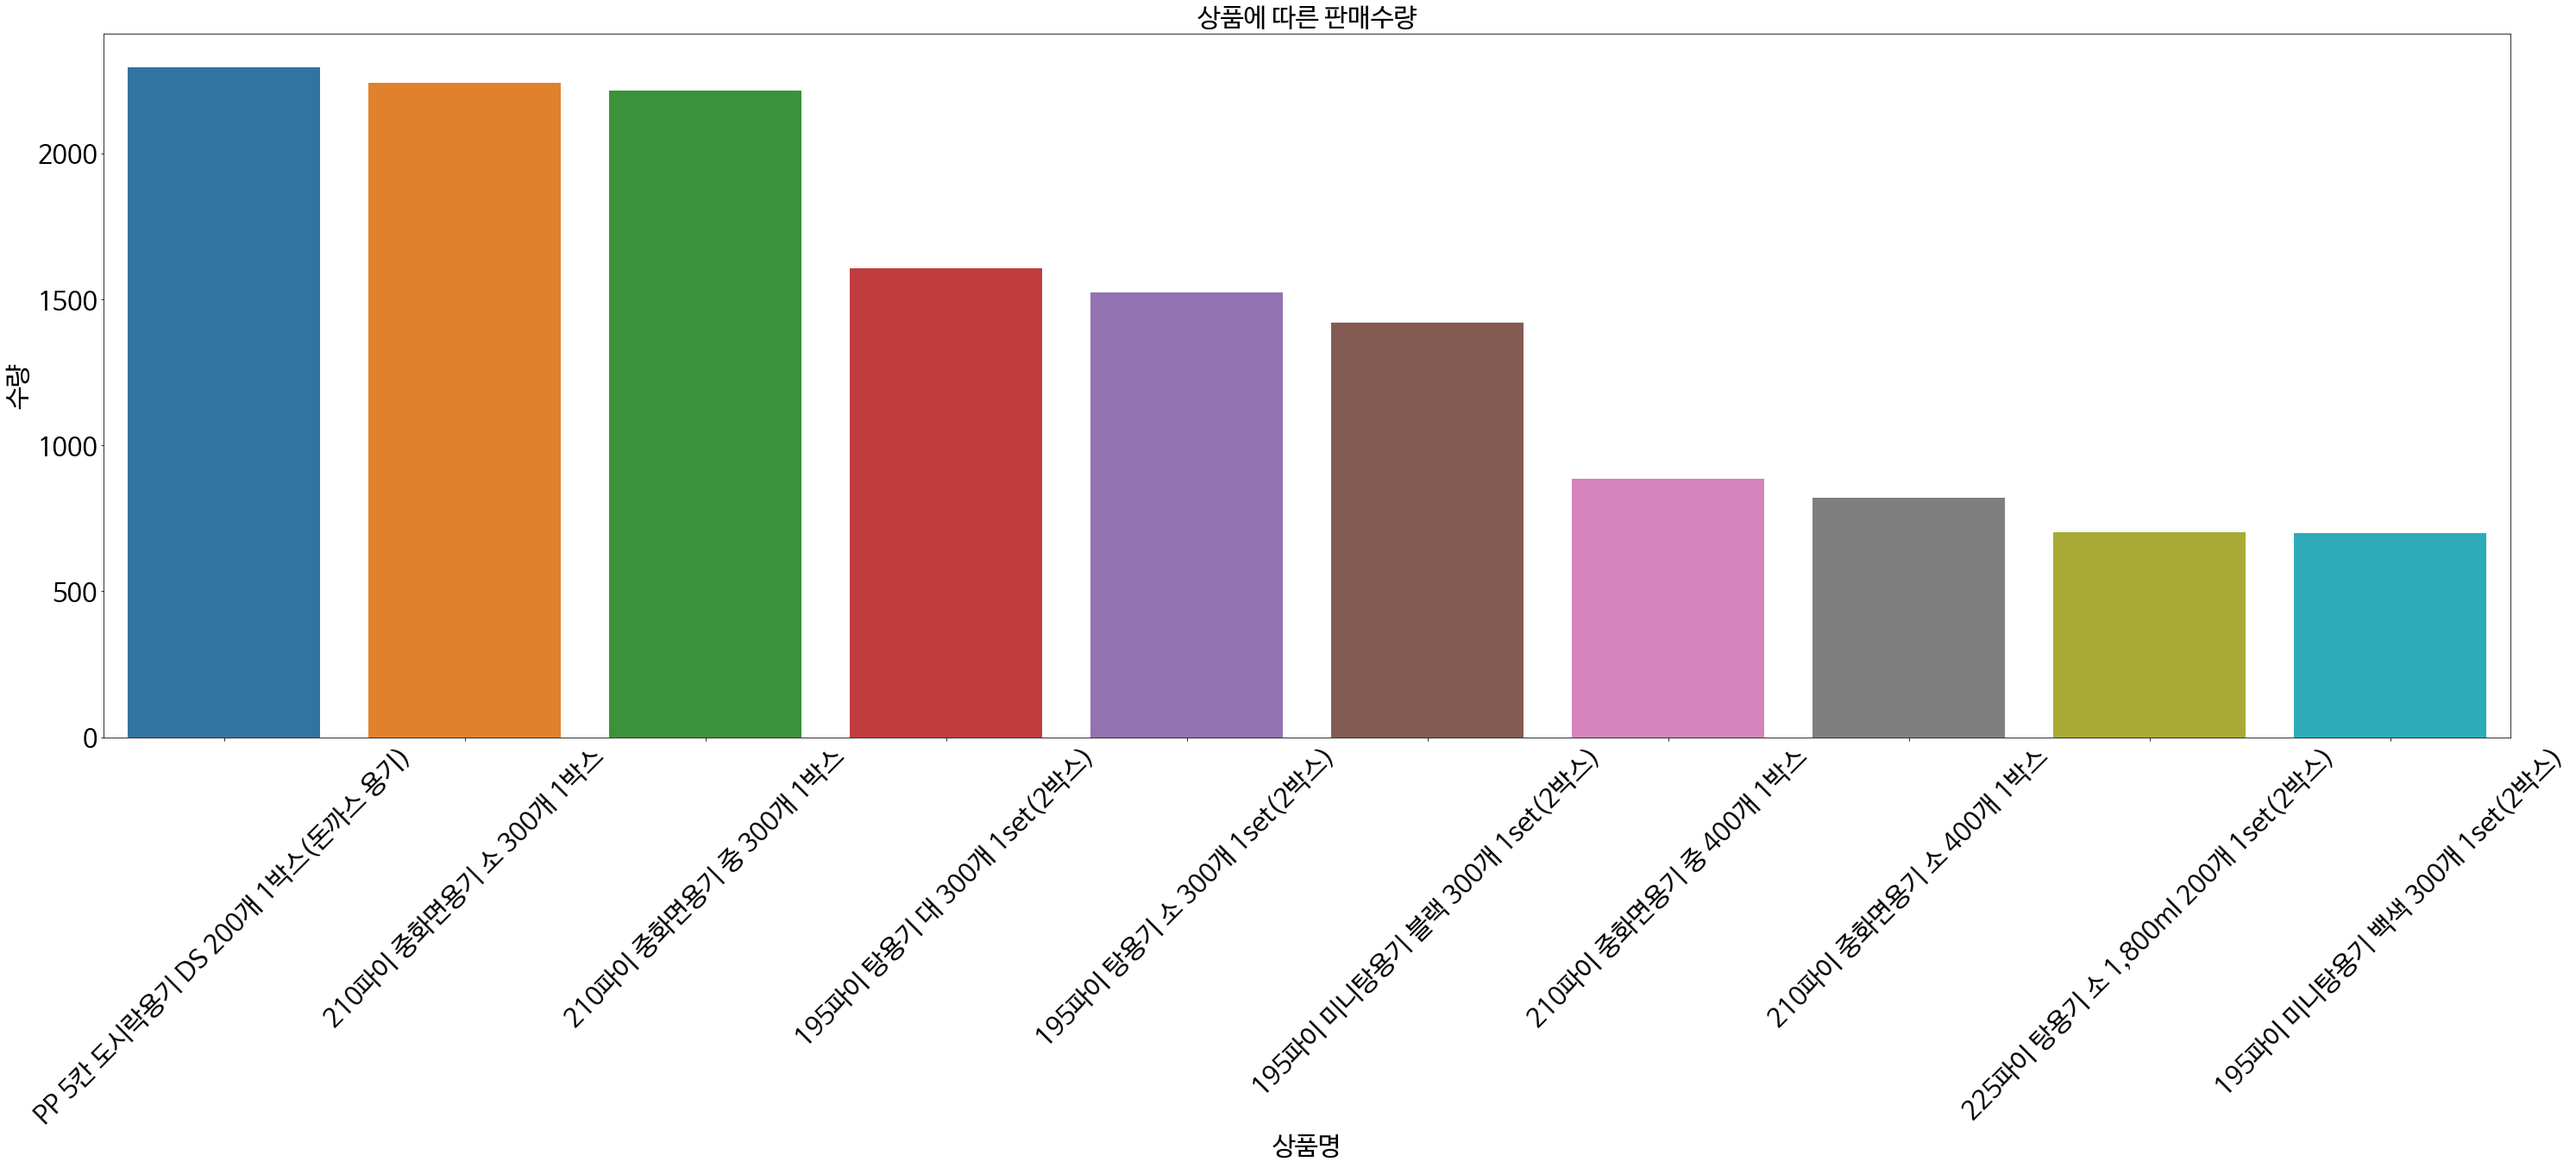

In [67]:
# order(사은품제외) 가장 많이 팔린 상품 top10

plt.figure(figsize=[50,15])
plt.rc('axes', labelsize=30)
plt.rc('axes', titlesize=30)
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
plt.title("상품에 따른 판매수량")
ax = sns.barplot(data=product_p2_sum, x='상품명', y='수량')

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(45)

In [14]:
# df_order.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '결제수단', '공급원가', '교환구분',
       '네이버 포인트', '배송번호', '배송비 정보', '배송시작일', '배송완료일', '사용한 적립금액', '상품구매금액',
       '상품명', '상품번호', '상품별 추가할인금액', '수량', '수령인 주소', '주문 시 회원등급', '주문경로',
       '주문번호', '주문일시', '주문자ID', '카드사', '쿠폰 할인금액', '판매가', '품목번호', '주문년월',
       '상품판매이익'],
      dtype='object')

# 제품_카테고리_시트 불러오기

In [15]:
df_product = pd.read_csv("product_category_sheet.csv", engine='python')
df_product

,Unnamed: 0,Unnamed: 0.1,공급사,과세/면세,담기,매입가,상품명(기본),상품코드,재입고알림,제조사,카테고리,reg_카테고리,대분류,판매가,품절여부,후기
0,0,0,패커스,과세,0,55440,"실링용기 71호 백색 2,200ml 400개 1박스",2184,사용함,자체제작,018 : 실링용기\n018002 : 실링용기 > 2319(2318)시리즈\n042...,2319(2318)시리즈 실링용기 실링제품,실링제품,77480,정상,0
1,1,1,(주)니드코,과세,0,3080,"니드코]국산제품 정식쟁반,병원식판,분식점 돈까스쟁반 업소용 화이트 항균아트쟁반 5호",2181,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,소모품 주방용품 쟁반,주방용품,4950,정상,0
2,2,2,(주)니드코,과세,10,1120,"니드코]QueenRose 장미 밥공기그릇 /중국집,주방,식당,가정용 깨지지 않는 단...",2180,사용함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,소모품 주방용품 식기,주방용품,1800,정상,0
3,3,3,(주)니드코,과세,0,5600,니드코 터치미 종이컵디스펜서(자석형) 종이컵보관함,2179,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,소모품 주방용품 주방잡화,주방용품,9000,정상,0
4,4,4,(주)니드코,과세,0,42000,니드코 뉴카멜리아 사각수저함(수저통),2178,사용안함,(주)니드코,002 : 주방용품\n002002 : 주방용품 > 주방용품\n046 : 주방용품/소...,소모품 주방용품,주방용품,65000,정상,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1012,1015,패커스,과세,23,44000,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",42,사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,60720,정상,30
1013,1013,1016,패커스,과세,1,89100,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",41,사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,110570,정상,18
1014,1014,1017,패커스,과세,4,85800,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",40,사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,106620,정상,2
1015,1015,1018,패커스,과세,6,49500,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",39,사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,65470,정상,11


In [16]:
# "상품코드" 열 이름을 "상품번호"로 바꿈

df_product.rename(columns = {"상품코드": "상품번호"}, inplace = True)

In [17]:
# order를 상품번호로 묶은 피봇과 제품카테고리시트 merge

df_mer_product = pd.merge(product_p1, df_product, on='상품번호', how='inner')
df_mer_product

,상품번호,상품명,상품구매금액,수량,Unnamed: 0,Unnamed: 0.1,공급사,과세/면세,담기,매입가,상품명(기본),재입고알림,제조사,카테고리,reg_카테고리,대분류,판매가,품절여부,후기
0,38,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",30359400,490,1016,1019,패커스,과세,17,42900,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,55870,정상,39
1,39,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",6646410,93,1015,1018,패커스,과세,6,49500,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,65470,정상,11
2,40,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",16915410,142,1014,1017,패커스,과세,4,85800,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,106620,정상,2
3,41,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",14161240,113,1013,1016,패커스,과세,1,89100,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,110570,정상,18
4,42,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",37785215,576,1012,1015,패커스,과세,23,44000,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,60720,정상,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1632,225파이 뚜껑 200개 1BOX,22500,1,496,498,패커스,과세,1,109000,미소찬 마늘가루 400g 20개 (박스 상품),사용함,자체제작,050 : 식자재\n050001 : 식자재 > 한식 식자재\n050001001 : ...,파우더 식자재 한식,식자재,124300,정상,0
376,1633,"5/8 직화용기320mm,295mm,사각직화용기270mm샘플",6430,1,495,497,패커스,과세,0,13600,미소찬 이온 물엿 14kg 1통,사용함,자체제작,050 : 식자재\n050001 : 식자재 > 한식 식자재\n050001005 : ...,물엿 식자재 당류 중식 한식,식자재,14800,정상,0
377,1679,5칸 도시락 용기 04 뚜껑 50개,6500,1,461,463,패커스,과세,0,12700,포모나 요거트(파우더) 1kg 1개 (낱개 상품),사용안함,카파아이엔티,050 : 식자재\n050005 : 식자재 > 카페 식재료\n050005006 : ...,파우더 식자재 카페 식재료,카페,13500,정상,0
378,1680,"5/27 320파이,250파이 원형직화냄비, 270,250 사각 직화냄비 샘플",12740,1,460,462,패커스,과세,0,5780,포모나 코코렛(파우더) 800g 1개 (낱개 상품),사용안함,카파아이엔티,050 : 식자재\n050005 : 식자재 > 카페 식재료\n050005006 : ...,파우더 식자재 카페 식재료,카페,6100,정상,0


In [18]:
# merge로 인해 발생한 NaN값 다른값으로 대체

df_mer_product['상품구매금액'] = df_mer_product["상품구매금액"].fillna(0)
df_mer_product['수량'] = df_mer_product["수량"].fillna(0)
df_mer_product['상품명'] = df_mer_product["상품명"].fillna("-")
df_mer_product

,상품번호,상품명,상품구매금액,수량,Unnamed: 0,Unnamed: 0.1,공급사,과세/면세,담기,매입가,상품명(기본),재입고알림,제조사,카테고리,reg_카테고리,대분류,판매가,품절여부,후기
0,38,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",30359400,490,1016,1019,패커스,과세,17,42900,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,55870,정상,39
1,39,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",6646410,93,1015,1018,패커스,과세,6,49500,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,65470,정상,11
2,40,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",16915410,142,1014,1017,패커스,과세,4,85800,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,106620,정상,2
3,41,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",14161240,113,1013,1016,패커스,과세,1,89100,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,110570,정상,18
4,42,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",37785215,576,1012,1015,패커스,과세,23,44000,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",사용함,자체제작,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,60720,정상,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1632,225파이 뚜껑 200개 1BOX,22500,1,496,498,패커스,과세,1,109000,미소찬 마늘가루 400g 20개 (박스 상품),사용함,자체제작,050 : 식자재\n050001 : 식자재 > 한식 식자재\n050001001 : ...,파우더 식자재 한식,식자재,124300,정상,0
376,1633,"5/8 직화용기320mm,295mm,사각직화용기270mm샘플",6430,1,495,497,패커스,과세,0,13600,미소찬 이온 물엿 14kg 1통,사용함,자체제작,050 : 식자재\n050001 : 식자재 > 한식 식자재\n050001005 : ...,물엿 식자재 당류 중식 한식,식자재,14800,정상,0
377,1679,5칸 도시락 용기 04 뚜껑 50개,6500,1,461,463,패커스,과세,0,12700,포모나 요거트(파우더) 1kg 1개 (낱개 상품),사용안함,카파아이엔티,050 : 식자재\n050005 : 식자재 > 카페 식재료\n050005006 : ...,파우더 식자재 카페 식재료,카페,13500,정상,0
378,1680,"5/27 320파이,250파이 원형직화냄비, 270,250 사각 직화냄비 샘플",12740,1,460,462,패커스,과세,0,5780,포모나 코코렛(파우더) 800g 1개 (낱개 상품),사용안함,카파아이엔티,050 : 식자재\n050005 : 식자재 > 카페 식재료\n050005006 : ...,파우더 식자재 카페 식재료,카페,6100,정상,0


In [19]:
df_mer_product = df_mer_product.loc[:, ["상품번호","상품명(기본)","상품명","공급사","카테고리","reg_카테고리","대분류","품절여부","후기","매입가","상품구매금액","수량"]]

In [20]:
# 최종 merge한 테이블

df_mer_product

,상품번호,상품명(기본),상품명,공급사,카테고리,reg_카테고리,대분류,품절여부,후기,매입가,상품구매금액,수량
0,38,"70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)","70파이 다용도컵 세트 1호 소 70ml 백색 PS 3,000개 1set(2박스)",패커스,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,정상,39,42900,30359400,490
1,39,"70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)","70파이 다용도컵 세트 2호 대 80ml 백색 PS 3,000개 1set(2박스)",패커스,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,정상,11,49500,6646410,93
2,40,"75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)","75파이 다용도컵 세트 3호 소 150ml 백색 PS 3,000개 1set(2박스)",패커스,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,정상,2,85800,16915410,142
3,41,"75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)","75파이 다용도컵 세트 3호 대 165ml 백색 PS 3,000개 1set(2박스)",패커스,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,정상,18,89100,14161240,113
4,42,"95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)","95파이 다용도컵 세트 4호 소 200ml 백색 PS 1,000개 1set(2박스)",패커스,039 : 중식 용기\n039003 : 중식 용기 > 소스/국/밥용기\n040 : ...,밥용기 국 반찬용기 떡 일식 양식 용기 중식 한식(분식) 소스,용기,정상,30,44000,37785215,576
...,...,...,...,...,...,...,...,...,...,...,...,...
375,1632,미소찬 마늘가루 400g 20개 (박스 상품),225파이 뚜껑 200개 1BOX,패커스,050 : 식자재\n050001 : 식자재 > 한식 식자재\n050001001 : ...,파우더 식자재 한식,식자재,정상,0,109000,22500,1
376,1633,미소찬 이온 물엿 14kg 1통,"5/8 직화용기320mm,295mm,사각직화용기270mm샘플",패커스,050 : 식자재\n050001 : 식자재 > 한식 식자재\n050001005 : ...,물엿 식자재 당류 중식 한식,식자재,정상,0,13600,6430,1
377,1679,포모나 요거트(파우더) 1kg 1개 (낱개 상품),5칸 도시락 용기 04 뚜껑 50개,패커스,050 : 식자재\n050005 : 식자재 > 카페 식재료\n050005006 : ...,파우더 식자재 카페 식재료,카페,정상,0,12700,6500,1
378,1680,포모나 코코렛(파우더) 800g 1개 (낱개 상품),"5/27 320파이,250파이 원형직화냄비, 270,250 사각 직화냄비 샘플",패커스,050 : 식자재\n050005 : 식자재 > 카페 식재료\n050005006 : ...,파우더 식자재 카페 식재료,카페,정상,0,5780,12740,1


In [21]:
# merge 테이블에서 대분류로 전체 수량과 상품구매금액 합

product_p1_cate = pd.pivot_table(data=df_mer_product, index=('대분류'),values=['상품구매금액','수량'],aggfunc='sum').reset_index()
product_p1_cate

,대분류,상품구매금액,수량
0,식자재,151000,5
1,실링제품,206975395,2574
2,용기,2502304335,34292
3,주방용품,111617600,3911
4,카페,123420,4


In [22]:
#
tmp=[]
a=product_p1_cate['상품구매금액']

In [23]:
for i in a:
    tmp.append(int(i))
tmp
#

[151000, 206975395, 2502304335, 111617600, 123420]

In [24]:
# product_p1, df_product
"""
sum_num =0
for i in range(len(product_p1)):
    for j in range(len(df_product)):
        if product_p1["상품명"][i] == df_product["상품명(기본)"][j] and df_product["대분류"][j] == "식자재":
            #print(df_product["상품명(기본)"][j], product_p1["수량"][i])
            sum_num += product_p1["수량"][i]
#print(sum_num)
"""
df_mer_product[df_mer_product["대분류"]=="실링제품"]

,상품번호,상품명(기본),상품명,공급사,카테고리,reg_카테고리,대분류,품절여부,후기,매입가,상품구매금액,수량
30,104,"실링용기 1호 백색 1,350ml 800개 1박스","실링용기 1호 백색 1,350ml 800개 1박스",패커스,038 : 한식(분식) 용기\n038001 : 한식(분식) 용기 > 탕/찜/죽/면용...,탕 죽 찜 용기 한식(분식) 실링용기 면용기 실링제품,실링제품,정상,1,59840,6851380,80
31,106,실링용기 6호 TI-507 백색 200ml 2400개 1박스,실링용기 6호 TI-507 백색 200ml 2400개 1박스,패커스,042 : 실링제품\n042001 : 실링제품 > 실링용기,실링용기 실링제품,실링제품,정상,0,48000,1955240,24
33,108,"실링용기 5호 TI-506 백색 230ml 2,400개 1박스","실링용기 5호 TI-506 백색 230ml 2,400개 1박스",패커스,042 : 실링제품\n042001 : 실링제품 > 실링용기,실링용기 실링제품,실링제품,정상,0,55200,2233160,26
35,110,"실링용기 4호 TI-505 백색 400ml 2,400개 1박스","실링용기 4호 TI-505 백색 400ml 2,400개 1박스",패커스,042 : 실링제품\n042001 : 실링제품 > 실링용기,실링용기 실링제품,실링제품,정상,5,72000,3066580,29
64,246,130 실링필름 Hold 130mm x 200 meter 투명 무지 4롤 1박스,130 실링필름 Hold 130mm x 200 meter 투명 무지 4롤 1박스,패커스,042 : 실링제품\n042003 : 실링제품 > 실링필름\n061 : vol.4 ...,실링필름 실링제품,실링제품,정상,0,32120,692580,15
65,248,150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스,150 실링필름 Hold 150mm x 200 meter 투명 무지 4롤 1박스,패커스,042 : 실링제품\n042003 : 실링제품 > 실링필름\n061 : vol.4 ...,실링필름 실링제품,실링제품,정상,10,33000,17369650,352
66,250,160 실링필름 Hold 160mm x 200 meter 투명 무지 4롤 1박스,160 실링필름 Hold 160mm x 200 meter 투명 무지 4롤 1박스,패커스,042 : 실링제품\n042003 : 실링제품 > 실링필름\n061 : vol.4 ...,실링필름 실링제품,실링제품,정상,5,34320,5311175,103
67,252,190 실링필름 Hold 190mm x 200 meter 투명 무지 4롤 1박스,190 실링필름 Hold 190mm x 200 meter 투명 무지 4롤 1박스,패커스,042 : 실링제품\n042003 : 실링제품 > 실링필름\n061 : vol.4 ...,실링필름 실링제품,실링제품,정상,0,42240,3740350,60
68,254,200 실링필름 Hold 200mm x 200 meter 투명 무지 4롤 1박스,200 실링필름 Hold 200mm x 200 meter 투명 무지 4롤 1박스,패커스,042 : 실링제품\n042003 : 실링제품 > 실링필름\n061 : vol.4 ...,실링필름 실링제품,실링제품,정상,0,44880,2616160,37
69,256,245 실링필름 Hold 245mm x 200 meter 투명 무지 2롤 1박스,245 실링필름 Hold 245mm x 200 meter 투명 무지 2롤 1박스,패커스,042 : 실링제품\n042003 : 실링제품 > 실링필름\n061 : vol.4 ...,실링필름 실링제품,실링제품,정상,0,29700,1988700,40


In [25]:
product_p1_cate['상품구매금액']=tmp

In [26]:
product_p1_cate

,대분류,상품구매금액,수량
0,식자재,151000,5
1,실링제품,206975395,2574
2,용기,2502304335,34292
3,주방용품,111617600,3911
4,카페,123420,4


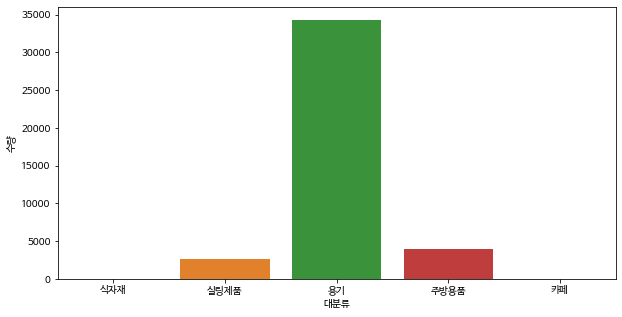

In [27]:
# 대분류 수량 bar 그래프

plt.figure(figsize=[10,5])
sns.barplot(data=product_p1_cate, x='대분류', y='수량')

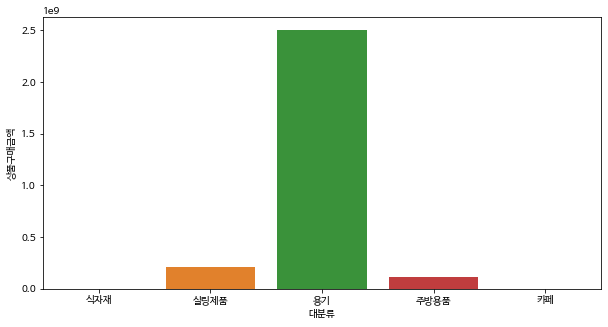

In [28]:
# 대분류 판매금액 bar 그래프


plt.figure(figsize=[10,5])
sns.barplot(data=product_p1_cate, x='대분류', y='상품구매금액')